# Monitor de consulta

Describir las funciones del monitor


In [1]:
import os, json, yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import modulos.consultas as consultas

from ipywidgets import widgets

In [2]:
# Paths absolutos
__file__ = 'monitor_consulta.ipynb'
CURRENT = os.path.dirname(os.path.abspath(__file__))
ROOT = os.path.dirname(CURRENT)

# Archivo de configuración
with open(os.path.join(ROOT, 'config.yaml'), 'r') as f:
    config = yaml.safe_load(f)
f.close()

# Paths de datos
TIEMPO_PATH = os.path.join(ROOT, config['datos']['tiempo'])
REGION_PATH = os.path.join(ROOT, config['datos']['region'])
RELACI_PATH = os.path.join(ROOT, config['etl']['relacionados'])

# Interés en el tiempo
Carga de datos

In [3]:
with open(file=TIEMPO_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [4]:
# Criterios búsqueda
with open(file=os.path.join(ROOT, config['datos']['criterios']), mode='r') as f:
    criterios_busqueda = [row.strip() for row in f]        
f.close()

# Criterios consultados
consultados = consultas.criterios_existentes(file=TIEMPO_PATH)

**PCC**

In [5]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 85.11%


## Exploración tabular


In [6]:
def ver_tiempo(criterio):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    
    return pd.DataFrame(consulta).head()

# consultas = list(contenido[0].keys())
# consultas.remove("criterio")

widgets.interact(ver_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_tiempo(criterio)>

## Visualización inicial

In [7]:
def plot_tiempo(criterio):
    # Filtro de datos
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    consulta = contenido[idx_criterio]['contenidos']
    over_time = pd.DataFrame(consulta)
    over_time['fecha'] = pd.to_datetime(over_time['fecha'])
    
    # Visualización
    fig, ax = plt.subplots(figsize=(16,6))

    scatter = ax.scatter(x=over_time['fecha'], y=over_time['valor'], c=over_time['parcial'], cmap='Paired')
    ax.plot(over_time['fecha'], over_time['valor'], color='black', alpha=0.25)

    #Anotaciones y estilo
    ax.set_title(label=f'Interés a lo largo del tiempo - {criterio.title()}\nÚltimos {config["etl"]["anios"]} años', fontsize=14, loc='left')
    ax.legend(*scatter.legend_elements(), loc="upper left", title="Parcial")
    ax.grid(alpha=0.1)

    plt.show()

In [8]:
widgets.interact(plot_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.plot_tiempo(criterio)>

# Interés región
Carga de datos

In [9]:
with open(file=REGION_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [10]:
# Criterios consultados
consultados = consultas.criterios_existentes(file=REGION_PATH)

**PCC**

In [11]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 100.00%


## Exploración tabular


In [12]:
def ver_region(criterio, periodo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']
    
    return pd.DataFrame(consulta).head()

widgets.interact(ver_region,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False),
                 periodo=widgets.IntSlider(
                     min=0,
                     max=len(contenido[0]["contenidos"])-1,
                     step=1,
                     description='Periodo')
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_region(criterio, periodo)>

# Temas relacionados
Carga de datos

In [13]:
with open(file=RELACI_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Inspección tabular

In [14]:
def ver_relacionados(criterio, periodo, tipo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']

    consulta = pd.DataFrame(consulta[tipo])
    
    return pd.DataFrame(consulta).head()

widgets.interact(
    ver_relacionados,
    criterio=widgets.Dropdown(
        options=[contenido[k]['criterio'] for k in range(len(contenido))],
        description='Criterio',
        disabled=False),
    periodo=widgets.IntSlider(
        min=0,
        max=len(contenido[0]["contenidos"])-1,
        step=1,
        description='Periodo'),
    tipo=widgets.Dropdown(
        options=['top','aumento'],
        description='Tipo',
        disabled=False)                
)

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_relacionados(criterio, periodo, tipo)>

## Descripción del corpus

¿Cuántas palabras únicas hay en todo el corpus?

In [15]:
corpus = list()
n_criterios = len(contenido)
for id_criterio in range(n_criterios):
    
    # Extraer lotes de consulta
    lotes = contenido[id_criterio]['contenidos']
    n_lotes = len(lotes)
    
    for id_lote in range(n_lotes):
        
        # Extraer el tipo de consulta del lote
        tipos = lotes[id_lote]['consulta']

        for tipo in tipos.keys():
            try:
                # Agregar token a corpus
                for doc_ in tipos[tipo]['descripcion'].values():
                    [corpus.append(word) for word in doc_ if word not in corpus]

            except TypeError:
                continue

corpus = {'token':corpus}
len(corpus['token'])

1236

¿Cuáles son las palabras más frecuentes?

In [16]:
def frecuencia_tokens(token):
    k = 0
    n_criterios = len(contenido)
    for id_criterio in range(n_criterios):
        
        # Extraer lotes de consulta
        lotes = contenido[id_criterio]['contenidos']
        n_lotes = len(lotes)
        
        for id_lote in range(n_lotes):
            
            # Extraer el tipo de consulta del lote
            tipos = lotes[id_lote]['consulta']

            for tipo in tipos.keys():
                try:
                    # Agregar token a corpus
                    for doc_ in tipos[tipo]['descripcion'].values():
                        for word in doc_:
                            if word == token: k += 1

                except TypeError:
                    continue

    return k

In [17]:
frecuencia = []
for token in corpus['token']:
    k = frecuencia_tokens(token)
    frecuencia.append(k)

corpus['cuenta'] = frecuencia

corpus = pd.DataFrame(corpus)

<AxesSubplot: ylabel='token'>

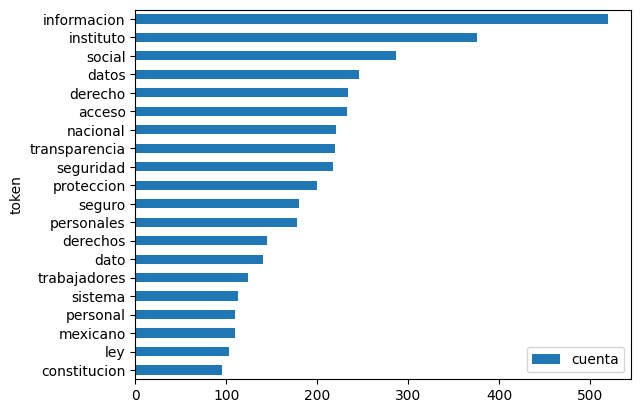

In [18]:
(
    corpus
    .sort_values(by='cuenta', ascending=True)
    .tail(20)
    .plot.barh(x='token', y='cuenta')
)